In [106]:
import requests
from bs4 import BeautifulSoup as bs
import time
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

start_time = time.time()

# Store all the pages that we are interested in the website
pages = []

# Construct URLs for each page
url_start = 'https://www.centralcharts.com/en/price-list-ranking/ALL/desc/ts_19-us-nasdaq-stocks--qc_3-previous-close-change?p='
for page_number in range(1, 5):
    url = url_start + str(page_number)
    pages.append(url)

# Contains lists that represent each row of the table
stock_list = [] 
for page in pages:
    webpage = requests.get(page)
    soup = bs(webpage.text, 'html.parser')
    
    stock_table = soup.find('table', class_='tabMini tabQuotes')
    tr_tag_list = stock_table.find_all('tr')
    
    for each_tr_tag in tr_tag_list[1:]:
        td_tag_list = each_tr_tag.find_all('td')
        
        row_values = []
        for each_td_tag in td_tag_list[0:7]:
           new_value = each_td_tag.text.strip()
           row_values.append(new_value)
        stock_list.append(row_values)
        
print(stock_list)
print('--- %s seconds ---' % (time.time() - start_time))


[['INNOVATIVE EYEWEAR INC.', '0.9830', '+428.49%', '0.2331', '1.1300', '0.2230', '944,432,386'], ['AKANDA CORP.', '4.11', '+71.97%', '5.17', '5.66', '3.03', '39,116,103'], ['ONEMEDNET CORP', '2.30', '+56.46%', '1.60', '3.21', '1.60', '136,208,255'], ['IPOWER INC.', '2.03', '+36.24%', '1.60', '2.06', '1.57', '1,406,599'], ['MERUS N.V.', '59.99', '+36.12%', '52.60', '61.61', '52.34', '6,908,179'], ['MINIM INC.', '4.29', '+32.82%', '3.30', '4.60', '3.18', '1,034,029'], ['YOSHITSU CO. LTD ADS', '0.3000', '+31.58%', '0.2400', '0.5019', '0.2195', '84,500,316'], ['QILIAN INTERNATIONAL HOLDING GROUP', '0.8680', '+31.54%', '0.6780', '0.9677', '0.6404', '158,704'], ['SMX (SECURITY MATTERS) PUBLIC', '0.1986', '+31.26%', '0.1468', '0.2900', '0.1467', '57,063,038'], ['BREEZE HLD.', '0.2025', '+29.81%', '0.2478', '0.2478', '0.2000', '11,100'], ['TRANSCODE THERAPEUTICS INC.', '1.79', '+28.78%', '1.45', '1.83', '1.42', '2,245,498'], ['ONCONETIX INC.', '0.1819', '+28.64%', '0.1446', '0.2850', '0.1372',

In [73]:

column_names = ['Name', 'Current Price', 'Change %', 'Open', 'High', 'Low', 'Volume']

df = pd.DataFrame(stock_list, columns = column_names)

print(df)

                             Name Current Price  Change %    Open    High  \
0         INNOVATIVE EYEWEAR INC.        0.9830  +428.49%  0.2331  1.1300   
1                    AKANDA CORP.          4.11   +71.97%    5.17    5.66   
2                  ONEMEDNET CORP          2.30   +56.46%    1.60    3.21   
3                     IPOWER INC.          2.03   +36.24%    1.60    2.06   
4                      MERUS N.V.         59.99   +36.12%   52.60   61.61   
..                            ...           ...       ...     ...     ...   
115    TAYSHA GENE THERAPIES INC.          3.24    +9.46%    2.94    3.27   
116    PLANET IMAGE INTERNATIONAL          2.20    +9.45%    2.20    2.21   
117             SCHMID GROUP N.V.          4.32    +9.37%    3.99    4.75   
118     TIZIANA LIFE SCIENCES LTD        0.8099    +9.34%  0.8000  0.8099   
119  GULF ISLAND FABRICATION INC.          7.08    +9.26%    6.51    7.09   

        Low       Volume  
0    0.2230  944,432,386  
1      3.03   39,116,

In [75]:
# Cleaning my new dataset

df.dropna(inplace = True)

In [76]:
#to use the Change % data I need to convert to a float variable

df['Change %'] = df['Change %'].str.rstrip('%').astype(float)


In [105]:
print(df.describe())

       Current Price      Change %          Open          High           Low  \
count   1.200000e+02  1.200000e+02  1.200000e+02  1.200000e+02  1.200000e+02   
mean    1.480297e-17 -3.700743e-18 -1.480297e-17 -1.480297e-17  1.480297e-17   
std     1.004193e+00  1.004193e+00  1.004193e+00  1.004193e+00  1.004193e+00   
min    -3.034970e-01 -9.044850e-01 -3.015271e-01 -3.078056e-01 -2.984179e-01   
25%    -2.792431e-01 -7.448767e-01 -2.793827e-01 -2.835402e-01 -2.762174e-01   
50%    -2.182310e-01 -3.881275e-01 -2.164501e-01 -2.186992e-01 -2.171627e-01   
75%    -8.086228e-02  3.875462e-01 -7.853332e-02 -7.686733e-02 -7.547953e-02   
max     1.004887e+01  2.436295e+00  1.007486e+01  1.003030e+01  1.008669e+01   

             Volume  
count  1.200000e+02  
mean   7.401487e-18  
std    1.004193e+00  
min   -4.304546e-01  
25%   -4.252257e-01  
50%   -4.010672e-01  
75%   -1.835452e-01  
max    3.262806e+00  


In [101]:
#winsorizing the dataset is important to make sure outliers are not effecting the analysis.
#For irregular stock activities, I will winsorize to conform towards normality.
# A good prescription is to winsorize rates of return around plus and minus 10- 15%, especially for samples of all CRSP stocks. There is no meaningful predictive gain using stocks’ own means and standard deviations and/or contemporaneous market rates of return; and eliminating or zeroing returns rather than winsorizing them. Winsorizing is better than not winsorizing.

from scipy.stats.mstats import winsorize
df['Volume'] = winsorize(df['Volume'], limits=[0.05, 0.05])  # Winsorize volume column

df['Change %'] = winsorize(df['Change %'], limits=[0.05, 0.05])

def clean_volume(volume):
    if isinstance(volume, str):
        return float(volume.replace(',', ''))
    else:
        return volume

# Apply the custom function to the 'Volume' column
df['Volume'] = df['Volume'].apply(clean_volume)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = ['Current Price', 'Change %', 'Open', 'High', 'Low', 'Volume']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df[numeric_columns]

df


,Name,Current Price,Change %,Open,High,Low,Volume
0,INNOVATIVE EYEWEAR INC.,-0.272767,2.436295,-0.297908,-0.272501,-0.294866,3.262806
1,AKANDA CORP.,-0.155723,2.436295,-0.096016,-0.104417,-0.178663,1.279040
2,ONEMEDNET CORP,-0.223471,2.436295,-0.242009,-0.195323,-0.237861,3.262806
3,IPOWER INC.,-0.233577,2.436295,-0.242009,-0.237994,-0.239103,-0.369262
4,MERUS N.V.,1.935875,2.436295,1.843612,1.971578,1.862651,-0.128785
...,...,...,...,...,...,...,...
115,TAYSHA GENE THERAPIES INC.,-0.188287,-0.904485,-0.187211,-0.193097,-0.182803,-0.347664
116,PLANET IMAGE INTERNATIONAL,-0.227214,-0.904485,-0.217473,-0.232428,-0.219647,-0.430455
117,SCHMID GROUP N.V.,-0.147862,-0.904485,-0.144271,-0.138182,-0.138921,-0.426366
118,TIZIANA LIFE SCIENCES LTD,-0.279246,-0.904485,-0.274725,-0.284378,-0.273451,-0.427062


In [102]:
print(df.describe()) # descriptive analysis

       Current Price      Change %          Open          High           Low  \
count   1.200000e+02  1.200000e+02  1.200000e+02  1.200000e+02  1.200000e+02   
mean    1.480297e-17 -3.700743e-18 -1.480297e-17 -1.480297e-17  1.480297e-17   
std     1.004193e+00  1.004193e+00  1.004193e+00  1.004193e+00  1.004193e+00   
min    -3.034970e-01 -9.044850e-01 -3.015271e-01 -3.078056e-01 -2.984179e-01   
25%    -2.792431e-01 -7.448767e-01 -2.793827e-01 -2.835402e-01 -2.762174e-01   
50%    -2.182310e-01 -3.881275e-01 -2.164501e-01 -2.186992e-01 -2.171627e-01   
75%    -8.086228e-02  3.875462e-01 -7.853332e-02 -7.686733e-02 -7.547953e-02   
max     1.004887e+01  2.436295e+00  1.007486e+01  1.003030e+01  1.008669e+01   

             Volume  
count  1.200000e+02  
mean   7.401487e-18  
std    1.004193e+00  
min   -4.304546e-01  
25%   -4.252257e-01  
50%   -4.010672e-01  
75%   -1.835452e-01  
max    3.262806e+00  


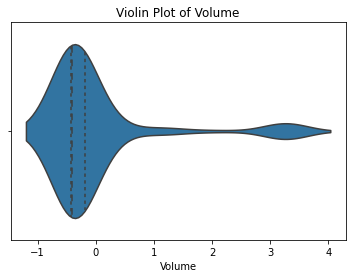

In [116]:
sns.violinplot(x=df['Volume'], inner='quartile')
plt.xlabel('Volume')
plt.title('Violin Plot of Volume')
plt.show()

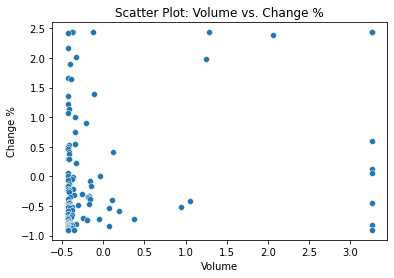

In [118]:
sns.scatterplot(x='Volume', y='Change %', data=df)
plt.xlabel('Volume')
plt.ylabel('Change %')
plt.title('Scatter Plot: Volume vs. Change %')
plt.show()


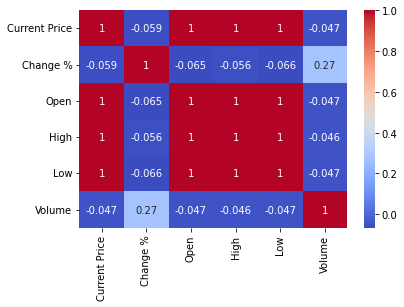

In [120]:
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

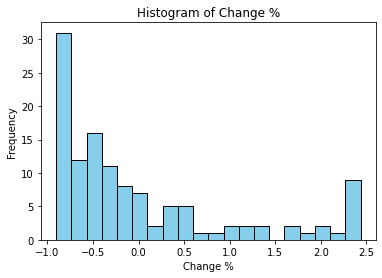

In [121]:
plt.hist(df['Change %'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Change %')
plt.ylabel('Frequency')
plt.title('Histogram of Change %')

plt.show()

In [127]:
#I want to analyze the winners

df_change_percentage_sorted = df.sort_values(by='Change %', ascending=False)

Top_5_Highest = df_change_percentage_sorted.head(5)

Top_5_Lowest = df_change_percentage_sorted.tail(5)

print(Top_5_Highest['Name'])

print(Top_5_Lowest['Name'])

0    INNOVATIVE EYEWEAR INC.
1               AKANDA CORP.
2             ONEMEDNET CORP
3                IPOWER INC.
4                 MERUS N.V.
Name: Name, dtype: object
115      TAYSHA GENE THERAPIES INC.
116      PLANET IMAGE INTERNATIONAL
117               SCHMID GROUP N.V.
118       TIZIANA LIFE SCIENCES LTD
119    GULF ISLAND FABRICATION INC.
Name: Name, dtype: object


In [ ]:
#Add in data to connect with the industry sectors each companies are categorized in.
#Analyze what industry had the largest movement and trading volume. 